# Bank Customer Churn Prediction

In this section of the report, we analyse customer banking data to identify the reasons why customers end their services with a bank. The goal is to develop  a predictive model that determines the likelihood of customers leaving so strategies can be put in place to prevent this. To contruct such a model, we must research customer behaviours, demographic data and csutomer product history, to spot potential "churners" before they leave.

## 1. Read Data and Import Necessary Functions

## Import Functions

In [74]:
# For data wrangling 
import numpy as np
import pandas as pd

# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Reading the Data

Here we agreed that storing the data file on a Google Drive was the simplest method. While is is possible to automate the download of data from Kaggle, this process has intricate steps involving authentication requirements. A method to automate the download was devoloped, as seen within a participants reflection. However complications with authentication took us away from the focus of analysis. So, for this first assignment, we decided to prioritise ease of access and running code.  

If for any reason the file can't be read, the original csv file can be sourced from here: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv


In [75]:
# Direct link to the CSV file on Google Drive
csv_url = 'https://drive.google.com/uc?id=14HTdhAmJd_U3mJDnwLHPbu6pvh-Yv0vu'

# Read the CSV file from the URL
df = pd.read_csv(csv_url)

df.shape

(10000, 14)

The DataFrame has 10,000 rows with 14 features. Our task now is to identify which of these features are relevant for building effective predictive models. But first, we will take a look at the Data Frame to see if any data manipulation or cleaning needs to be carried out. 

## 2. Initital Examination

In [76]:
# A quick look
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The .head(5) function in Pandas generates a well-structured format of the first 5 rows  in the csv file.

In [77]:
# Description of the data 
print(df.describe()) 

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [78]:
# Check columns list and missing values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Great! No missing values.

In [79]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

We will not require the first 2 attributes as these are specific to a customer. And for data privacy reasons, we remove the surname as well.

In [80]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.shape

(10000, 11)

As shown, we are now looking at 11 features.

In [81]:
# Review the top rows of what is left of the data frame
df.head(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The data appears to be a snapshot from a specific date which limits our model potential, where it would be better to have access to balances over a period of time rathern than just a single point. There are also anomalies we have to take into account, such as customers who have left but still show a bank balance. Moreover little is known about the types of products which could majorly factor into the reason a customer exits. Despite these uncertainties, we proceed to model with the available data.  

In [82]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So we 5 categorical variables: 
* Geography
* Gender
* HasCrCard
* IsActiveMember
* Exited

And 6 continuous variables
* CreditScore
* Age
* Tenure
* Balance
* NumOfProducts
* EstimatedSalary


## 3. Exploratory Data Analysis 

Here we build an understanding as to how the given features correspond to the 'Exit' status of customers.

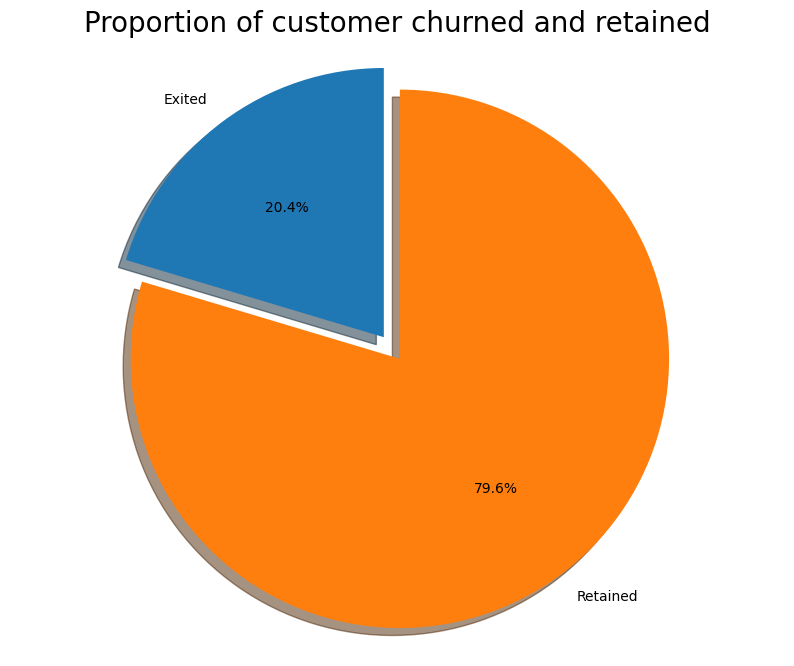

In [83]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited'] ==0].count()]  # count how many customers have left and continued to stay 
explode = (0, 0.1) # this simply offsets a chunk of the pie chart from the centre to emphasise it 
fig1, ax1 = plt.subplots(figsize=(10, 8)) #creates a new figure and a set of subplots, specifying the figure size to be 10 by 8 inches.
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90)  #sizes is the data, autopct formats the percentage display on the slices to one decimal place, 
ax1.axis('equal') #This ensures that the pie chart is a perfect circle by setting equal aspect ratio for the axes.
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

We observe that 20.4% of the customers have churned i.e. stopped using the bank's services. So for our predictive model, we could assume that approximately 20% of customers will churn, as this is the observed rate in the data. The bank will be more interested in the customers who have left, since this data holds insights into why customers leave, helping to prevent future "churners" for similar reasons.

## Categorical Variables and Exit Status

We want to analyse the number of individuals who exited in relation to a categorical variable. For example, we want to determine how many customers who either exited or retained in Germany.

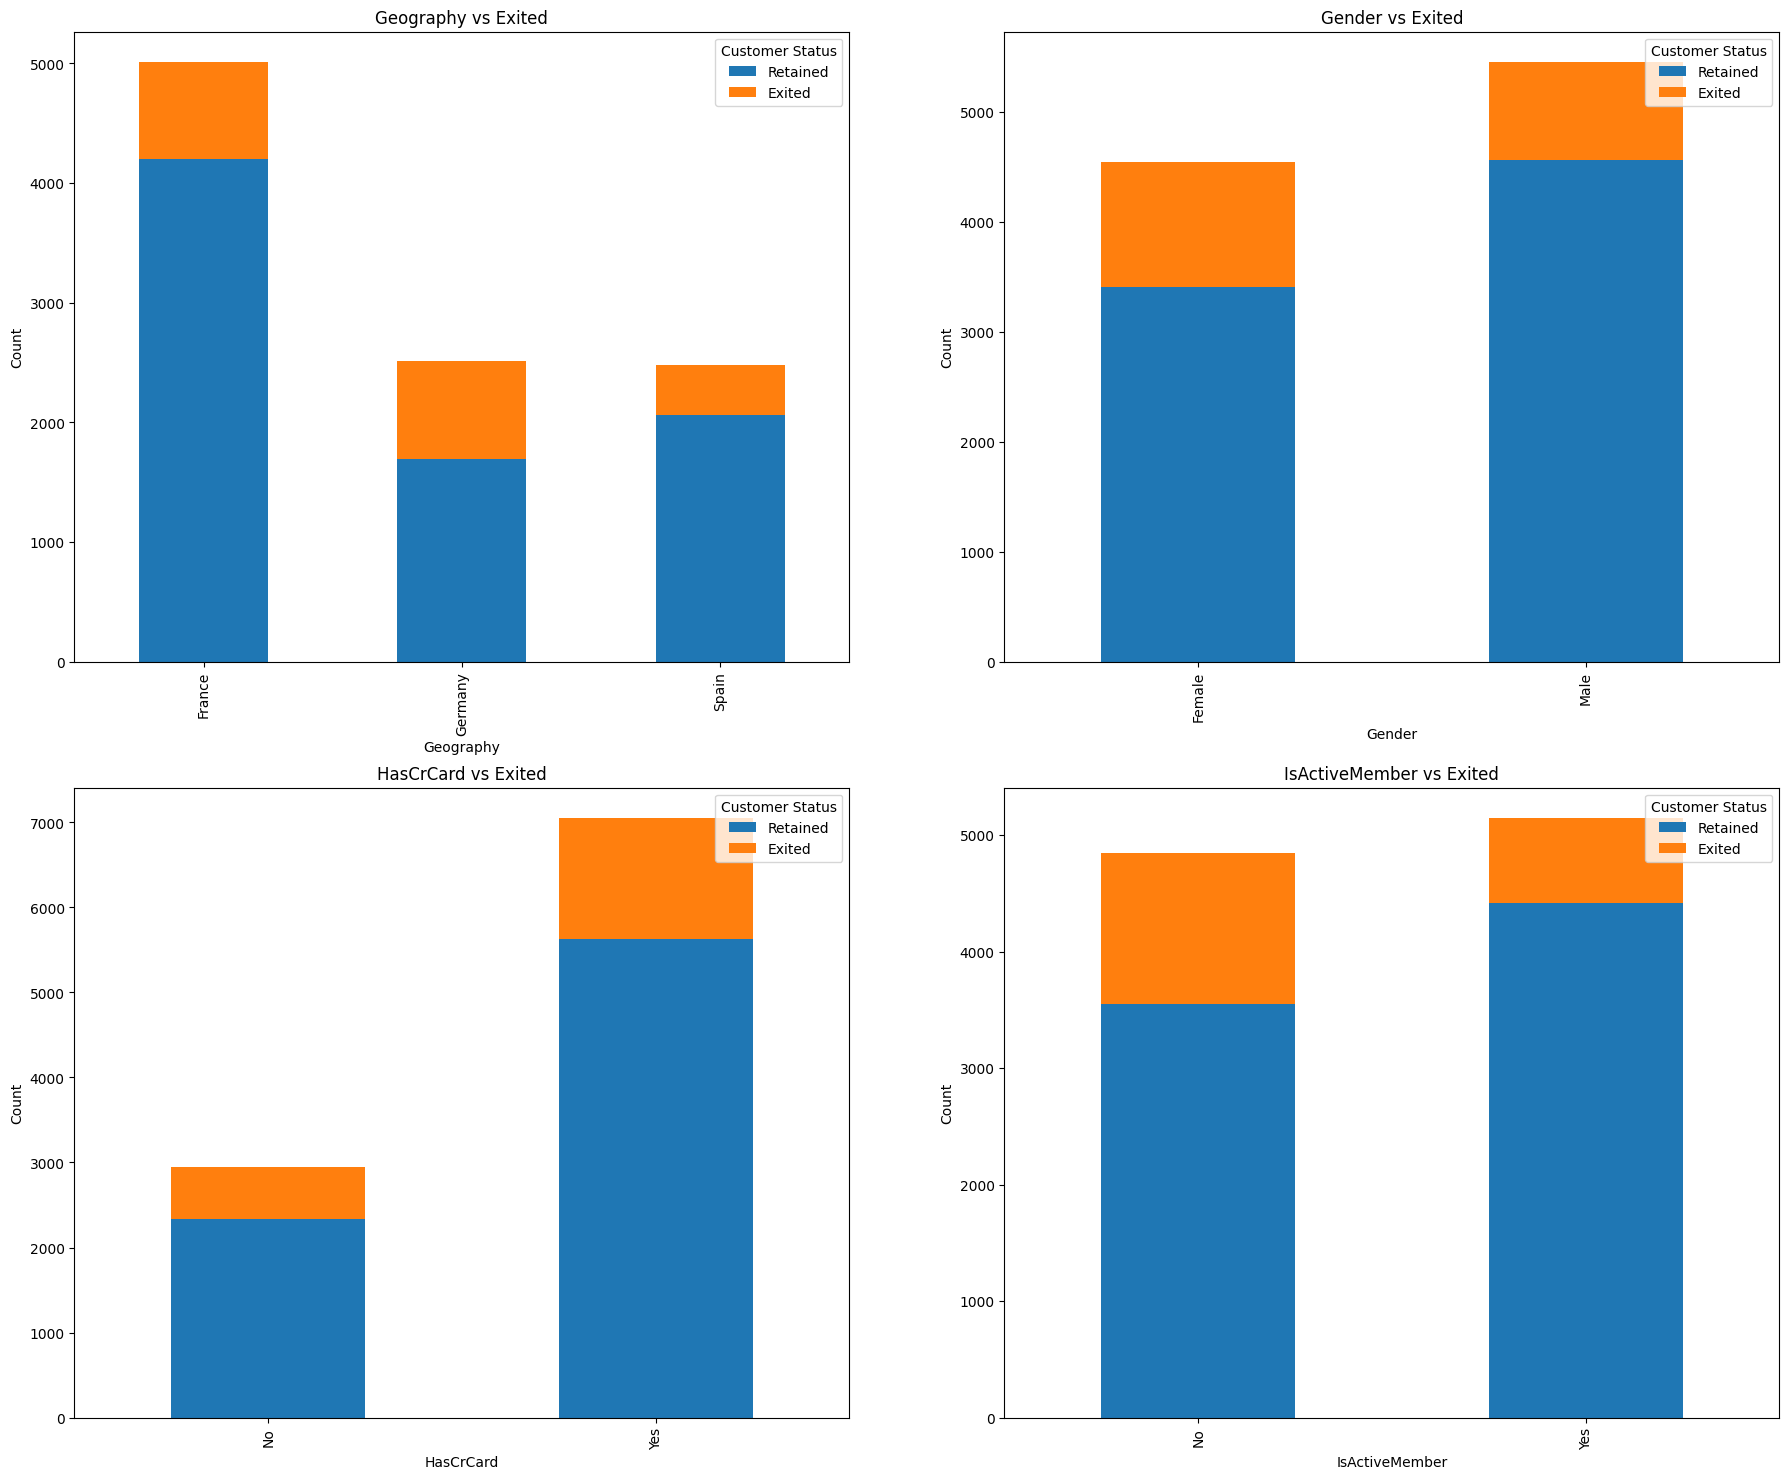

In [84]:
# We count the frequency of each combination of 'Geography' and 'Exited' 
fig, axis = plt.subplots(2, 2, figsize=(22, 18))

# For Geography column
geo_exit_counts = df.groupby(['Geography', 'Exited']).size().unstack()
geo_exit_counts.plot(kind='bar', stacked=True, ax=axis[0, 0])

axis[0,0].set_title('Geography vs Exited')
axis[0,0].set_ylabel('Count')
axis[0,0].set_xlabel('Geography')
axis[0,0].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')

# For gender column
gend_exit_counts = df.groupby(['Gender','Exited']).size().unstack()
gend_exit_counts.plot(kind = 'bar', stacked = True, ax = axis[0,1])

axis[0,1].set_title('Gender vs Exited')
axis[0,1].set_ylabel('Count')
axis[0,1].set_xlabel('Gender')
axis[0,1].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')

# For how many had a credit card
hasCrCard_exit_counts = df.replace({'HasCrCard':{1:'Yes',0:'No'}}).groupby(['HasCrCard','Exited']).size().unstack() #Temporarily changed the values of HasCrCard for ease of understanding visuals
hasCrCard_exit_counts.plot(kind = 'bar', stacked = True, ax = axis[1,0])


axis[1,0].set_title('HasCrCard vs Exited')
axis[1,0].set_ylabel('Count')
axis[1,0].set_xlabel('HasCrCard')
axis[1,0].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')

# For how many are active members
isActiveMember_exit_counts = df.replace({'IsActiveMember':{1:'Yes',0:'No'}}).groupby(['IsActiveMember','Exited']).size().unstack()
isActiveMember_exit_counts.plot(kind = 'bar', stacked = True, ax =axis[1,1])

axis[1,1].set_title('IsActiveMember vs Exited')
axis[1,1].set_ylabel('Count')
axis[1,1].set_xlabel('IsActiveMember')
axis[1,1].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')


It seems that the majority of our data involves individuals from France, yet the proportion of churned customers is inversely proportional to the amount of customers in each region. This means the bank is facing challenges in the areas where it has fewer clients, possibly due to less customer resources available in these regions. Notably, the proportion of female customers churning is slightly greater than that of male customers. Perhaps an issue with how products are tailored to individuals. Interestingly, the majority of customers who have churned hold credit cards. However, since the majority of customers in fact have credit cards, this could prove to be just a coincidence.
Unsurprisingly, inactive members have a greater rate of churn. What the bank should find concerning is that the overall proportion of inactive mebers is quite high, suggesting that the bank may need to implement a scheme to turn this group to active customers. 

## Continous Variables and Exit Status
We similarly create visuals to compare the continuous valued features with our customers exit status. 

Text(0, 0.5, 'EstimatedSalary')

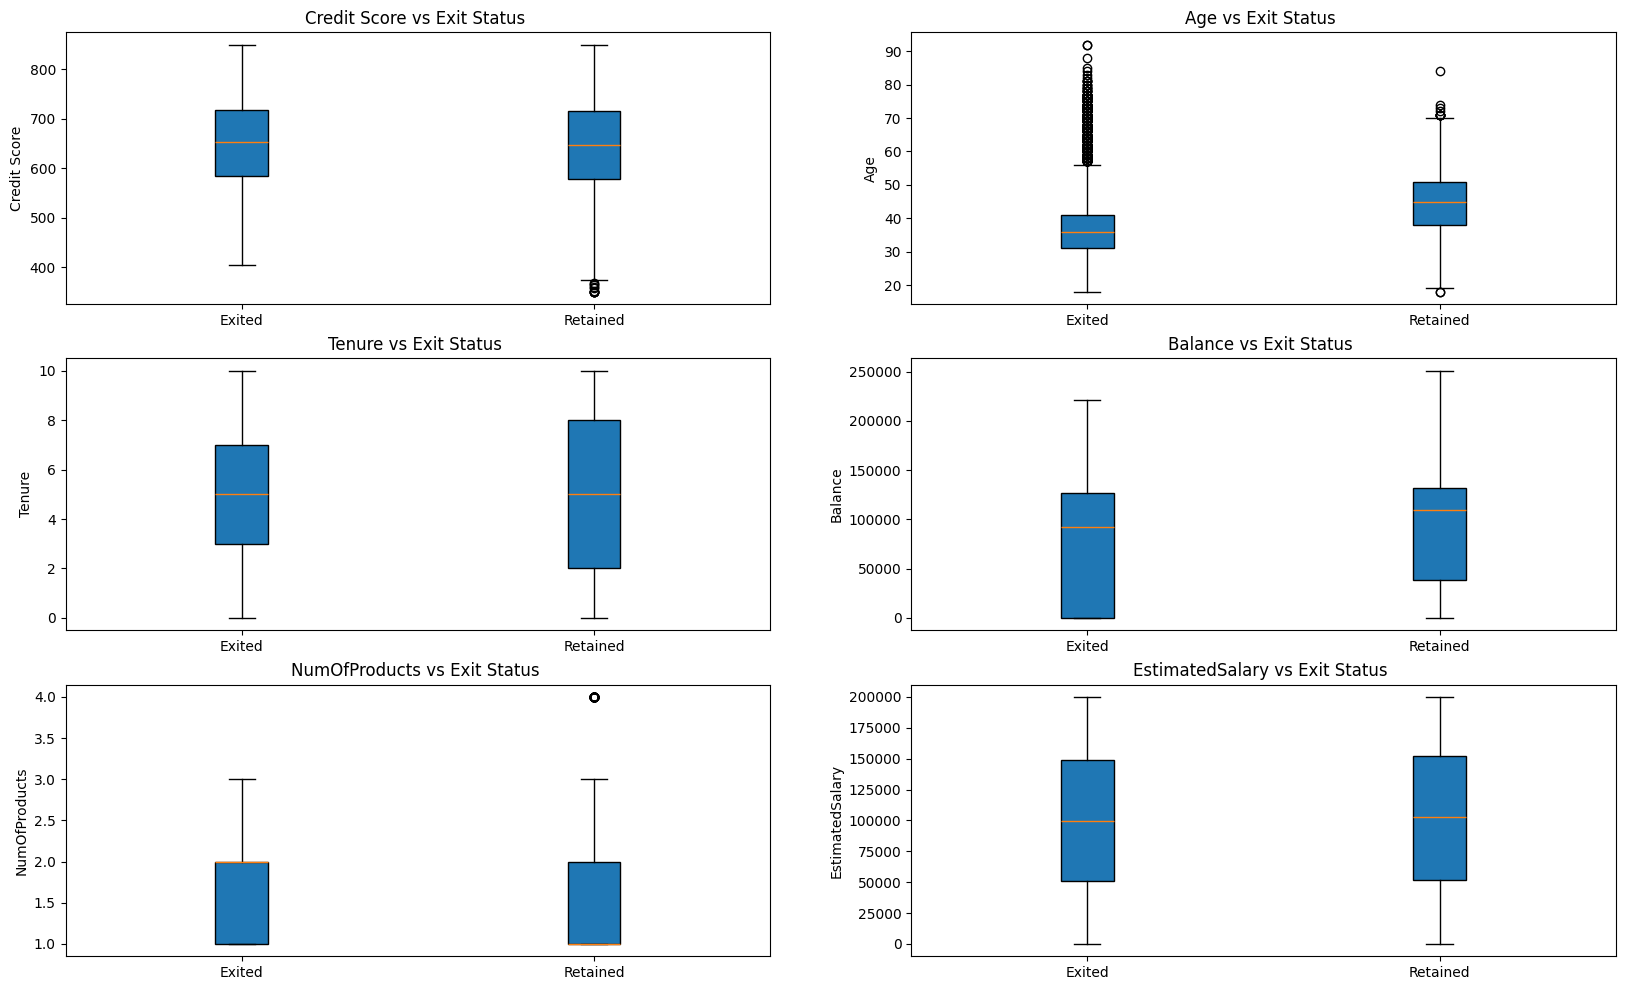

In [85]:
fig, axis = plt.subplots(3, 2, figsize=(20, 12))



axis[0][0].boxplot([df[df['Exited'] == 0]['CreditScore'], df[df['Exited'] == 1]['CreditScore']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[0][0].set_title('Credit Score vs Exit Status ')
axis[0][0].set_ylabel('Credit Score')


axis[0][1].boxplot([df[df['Exited'] == 0]['Age'], df[df['Exited'] == 1]['Age']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[0][1].set_title('Age vs Exit Status ')
axis[0][1].set_ylabel('Age')

axis[1][0].boxplot([df[df['Exited'] == 0]['Tenure'], df[df['Exited'] == 1]['Tenure']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[1][0].set_title('Tenure vs Exit Status ')
axis[1][0].set_ylabel('Tenure')

axis[1][1].boxplot([df[df['Exited'] == 0]['Balance'], df[df['Exited'] == 1]['Balance']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[1][1].set_title('Balance vs Exit Status ')
axis[1][1].set_ylabel('Balance')

axis[2][0].boxplot([df[df['Exited'] == 0]['NumOfProducts'], df[df['Exited'] == 1]['NumOfProducts']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[2][0].set_title('NumOfProducts vs Exit Status ')
axis[2][0].set_ylabel('NumOfProducts')

axis[2][1].boxplot([df[df['Exited'] == 0]['EstimatedSalary'], df[df['Exited'] == 1]['EstimatedSalary']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[2][1].set_title('EstimatedSalary vs Exit Status ')
axis[2][1].set_ylabel('EstimatedSalary')



To start with, there is no obvious difference in the credit score distribution between retained and churned customers. So this won't provide much help in creating predictions. Notabely, older customers are churning at a higher rate than younger, perhaps indicating a difference in product preference with the age of customers. From what we have seen so far, the bank may need to review their target market or redesign their products to prevent disparities in interet from different demographics. In regard to the tenure, the clients on both extreme ends (spent little time with the bank or a lot of time with the bank) have a greater likelihood to churn compared to those that are of average tenure (5 years). Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.


## 4. Feature Engineering

We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets.


In [86]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200) #randomly sample 80% of the rows from the dataframe
#random_state = 200 ensures the random sampling process is reproducible- we are seeding the 
#random number generator which ensures every time you run the code, the random sampling will pick the same rows
df_test = df.drop(df_train.index) #remove the rows used in training data to construct the testing data 
print(len(df_train))
print(len(df_test))


8000
2000


(-1.0, 5.0)

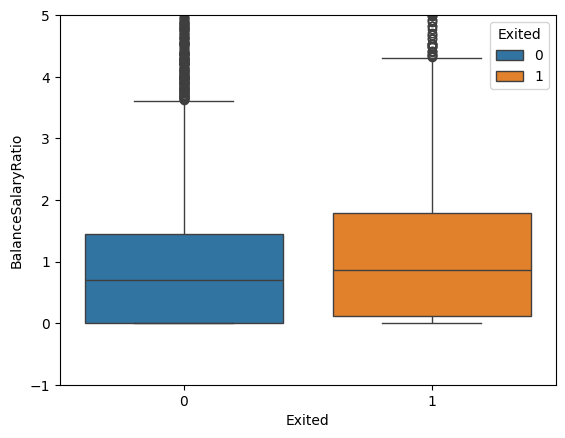

In [87]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

we have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

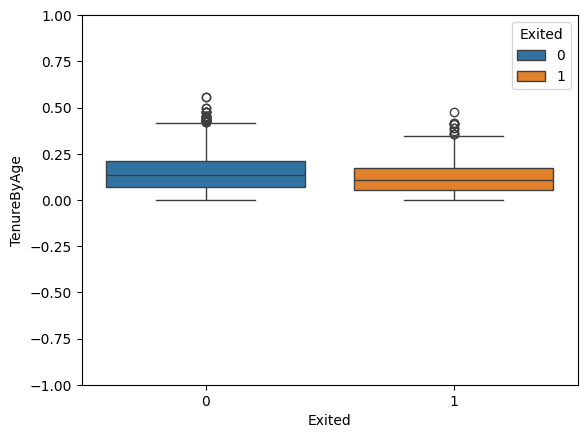

In [88]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [89]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [90]:
# Resulting Data Frame
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


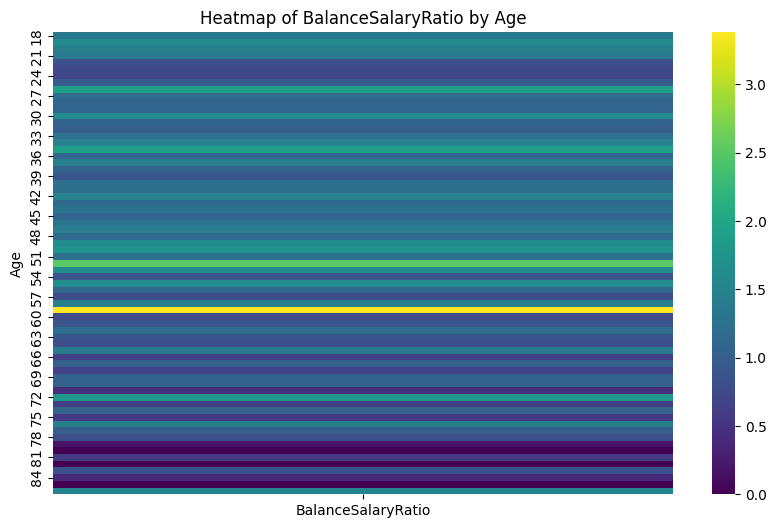

In [121]:

# Calculate mean values grouped by 'Age'
grouped_means = df_train.groupby('Age')[['BalanceSalaryRatio']].mean()


# Create a heatmap of the grouped mean values of BalanceSalaryRatio
plt.figure(figsize=(10, 6))
sns.heatmap(np.log(grouped_means+1),  cmap='viridis', fmt=".2f")
plt.title('Heatmap of BalanceSalaryRatio by Age')
plt.show()

This heatmap depicts the average BalanceSalaryRatio divided by Age. Middle-aged customers appear to have the largest balances given their salary, making them an ideal market for the bank to increase loan capital. It appears that at the extreme young and old age grous has the lowest ratio. It would be beneficial for the bank to tailor products for each demographic. 